<a href="https://colab.research.google.com/github/Balisa50/restaurant-data-analysis/blob/main/Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 1: Data Exploration**
 Explore dataset dimensions. Check
for missing values. Perform data
type conversions as needed.

Analyze "Aggregate rating"
distribution. Address any class
imbalances

 Calculate statistics for numerical
columns. Explore categorical
variables. Identify top 5 cuisines
and cities

# import liberies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read and print the dataset
link ="https://raw.githubusercontent.com/Oyeniran20/axia_class_cohort_7/refs/heads/main/Dataset%20.csv"
df = pd.read_csv(link)
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [ ]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

 # Understanding the data

In [ ]:

# checking shape (# of rows and columns)
df.shape

(9551, 21)

In [ ]:
# details about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:

# for numerical coulmns
pd.set_option('display.float_format', '{:.3f}'.format) # formatting to 3 dp
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.000,9051128.349,8791521.282,53.000,301962.500,6004089.000,18352291.500,18500652.000
Country Code,9551.000,18.366,56.751,1.000,1.000,1.000,1.000,216.000
Longitude,9551.000,64.127,41.467,-157.948,77.081,77.192,77.282,174.832
Latitude,9551.000,25.854,11.008,-41.330,28.479,28.570,28.643,55.977
Average Cost for two,9551.000,1199.211,16121.183,0.000,250.000,400.000,700.000,800000.000
Price range,9551.000,1.805,0.906,1.000,1.000,2.000,2.000,4.000
Aggregate rating,9551.000,2.666,1.516,0.000,2.500,3.200,3.700,4.900
Votes,9551.000,156.910,430.169,0.000,5.000,31.000,131.000,10934.000


In [ ]:
# for categorical coulmns
df.describe(include=['object']).T

,count,unique,top,freq
Restaurant Name,9551,7446,Cafe Coffee Day,83
City,9551,141,New Delhi,5473
Address,9551,8918,"Dilli Haat, INA, New Delhi",11
Locality,9551,1208,Connaught Place,122
Locality Verbose,9551,1265,"Connaught Place, New Delhi",122
Cuisines,9542,1825,North Indian,936
Currency,9551,12,Indian Rupees(Rs.),8652
Has Table booking,9551,2,No,8393
Has Online delivery,9551,2,No,7100
Is delivering now,9551,2,No,9517


In [ ]:
# checking for missing values in each columns and sorting them
df.isna().sum().sort_values(ascending = False)

,0
Cuisines,9
Restaurant Name,0
Country Code,0
City,0
Restaurant ID,0
Address,0
Locality,0
Longitude,0
Locality Verbose,0
Latitude,0


In [ ]:

# finding the total missing values
df.isna().sum().sum()

np.int64(9)

In [ ]:
print("Cuisines" in df.columns)  # Will print True or False

True


In [ ]:

# checking duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
print("Cuisines" in df.columns)

True


In [ ]:
# most freq cuisine
df['Cuisines'].mode()[0]

'North Indian'

In [ ]:

df[['Cuisines', 'City']].isnull().sum()

,0
Cuisines,9
City,0


In [ ]:
print("Cuisines" in df.columns)

True


In [ ]:
# filling the missing value spot with the mode
df["Cuisines"].fillna(df['Cuisines'].mode()[0], inplace=True)

<ipython-input-53-e300f3483ac6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cuisines"].fillna(df['Cuisines'].mode()[0], inplace=True)


In [ ]:
df.isna().sum().sum()

np.int64(0)

In [ ]:
print("Cuisines" in df.columns)  # Will print True or False



True


In [ ]:
# numerical columns
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [ ]:
# categorical columns
cat_cols = df.select_dtypes(['object', 'category']).columns
cat_cols

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

In [ ]:
print(df.dtypes)


Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [ ]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [ ]:


# top 10  cuisines
top_cuisines = df['Cuisines'].str.split(',').explode().str.strip().value_counts().head(10) # I separated the values
top_cuisines

,count
Cuisines,
North Indian,3960
Chinese,2735
Fast Food,1986
Mughlai,995
Italian,764
Bakery,745
Continental,736
Cafe,703
Desserts,653


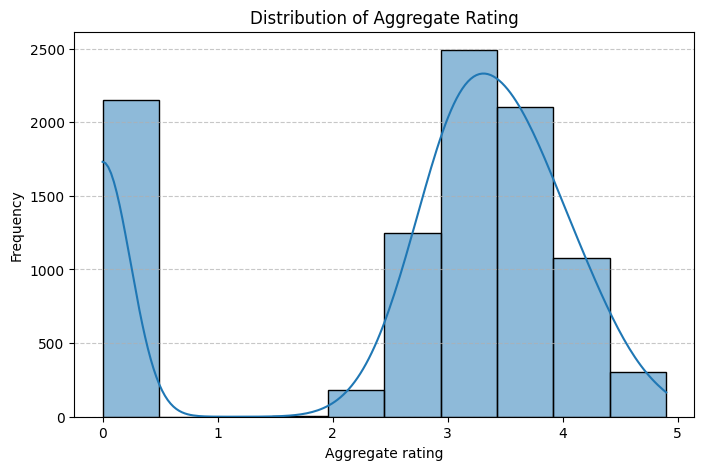


Aggregate Rating Distribution:
Aggregate rating
0.000    2148
1.800       1
1.900       2
2.000       7
2.100      15
2.200      27
2.300      47
2.400      87
2.500     110
2.600     191
2.700     250
2.800     315
2.900     381
3.000     468
3.100     519
3.200     522
3.300     483
3.400     498
3.500     480
3.600     458
3.700     427
3.800     400
3.900     335
4.000     266
4.100     274
4.200     221
4.300     174
4.400     144
4.500      95
4.600      78
4.700      42
4.800      25
4.900      61
Name: count, dtype: int64


In [ ]:
# Analyzing Aggregate Rating distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Aggregate rating"], bins=10, kde=True)
plt.xlabel("Aggregate rating")
plt.ylabel("Frequency")
plt.title("Distribution of Aggregate Rating")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Checking value counts to analyze class imbalance
rating_distribution = df["Aggregate rating"].value_counts().sort_index()
print("\nAggregate Rating Distribution:")
print(rating_distribution)


In [ ]:
# top 10  cities
top_city = df['City'].value_counts().head(10)
top_city

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
Bhubaneshwar,21
Lucknow,21
Ahmedabad,21
Amritsar,21


In [ ]:
#checking for skewness and inbalance for numerical columns
# before applying the sqrt
for col in num_cols:
    skewness = df[col].skew()
    print(f'{col} \n Skew = {skewness}')

Restaurant ID 
 Skew = 0.061569976479250714
Country Code 
 Skew = 3.043965346403779
Longitude 
 Skew = -2.8073278338140857
Latitude 
 Skew = -3.08163535060857
Average Cost for two 
 Skew = 35.477914900871276
Price range 
 Skew = 0.8896175931442
Aggregate rating 
 Skew = -0.9541304733200109
Votes 
 Skew = 8.807636687709472


In [ ]:
# applying the sqrt
df = df[num_cols].apply(np.sqrt)
for col in num_cols:
    skewness = df[col].skew()
    print(f'{col} \n Skew = {skewness}')

Restaurant ID 
 Skew = -0.04447115340657841
Country Code 
 Skew = 2.960356535483066
Longitude 
 Skew = -3.4414938224093645
Latitude 
 Skew = -3.2881814527542654
Average Cost for two 
 Skew = 19.649105873942954
Price range 
 Skew = 0.584859433949503
Aggregate rating 
 Skew = -1.2180856619500915
Votes 
 Skew = 2.518921597172645


In [ ]:
print("Cuisines" in df.columns)  # Will print True or False


True


# ***Key inferences***

The dataset has 9551 columns and 21 rows

its has 9 missing values, all from cuisine (which i replaced with the mode of the column)

There are 8 numerical columns and 13 categorical columns

All columns are in a correct data type (no need for converion)

For the descriptive statistics for the numerical columns, columns "Average cost for two" has a huge discrepency, it has a min of 0 and 800k which suspicious

There are no duplicated values

For the descriptive statistics for the categorical columns,(count,    unique ,    top , freq)
For the "Cuisines" column, there is a problem of some cuisines not been separted and are counted as 1, which is a properly in our analysis

I corrected the blunder by using the ".str.split(',').explode().str.strip()", and then count the top 10 and the top then cities

For the skewness and outlier detections; Variables like Country Code, Average Cost for Two, and Votes have a strong positive skew, meaning a small number of values are much larger than the rest.

Latitude and Longitude have a strong negative skew, suggesting a concentration of data points in certain locations.

Aggregate Rating and Price Range have mild skewness, indicating slight asymmetry but not extreme.

Restaurant ID is nearly symmetrical.

For the outliers i decided to use sqrt to minimise there effect, idk whether to remove them or not. i applied on the numerical columns

want to hear your views

# **Week 2: Data Visualization**

Create histograms,
bar plots, and box
plots of ratings.
Compare average *italicized text*
ratings across
cuisines and cities.

 Map restaurant
locations using
coordinates.
Analyze distribution
across cities.
Correlate location
with ratings

 Identify outliers and
their effects.
Determine
relationship
between votes and
ratings.
**bold text**

Create histograms,
bar plots, and box
plots of ratings.
Compare average
ratings across
cuisines and cities.

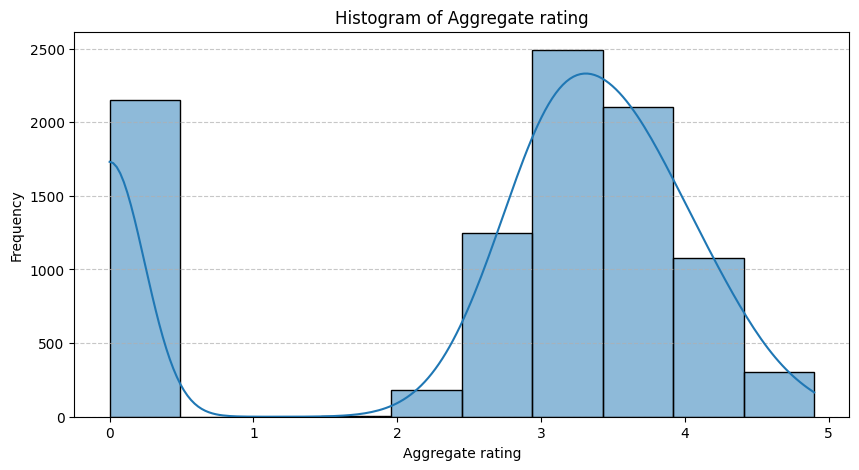

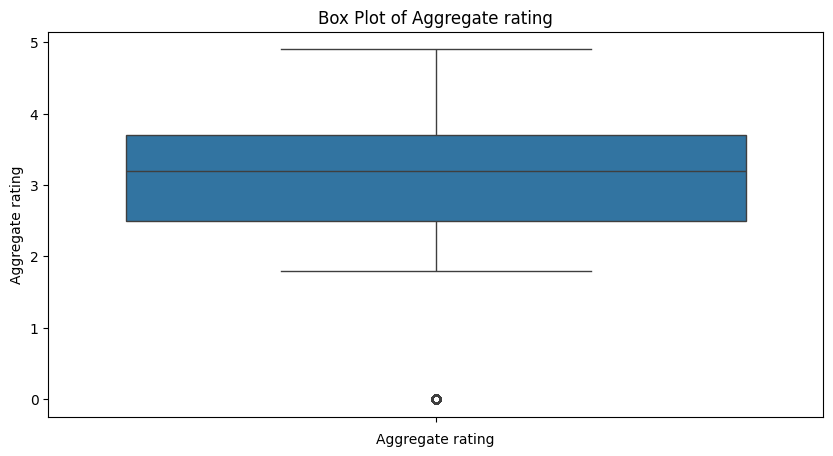

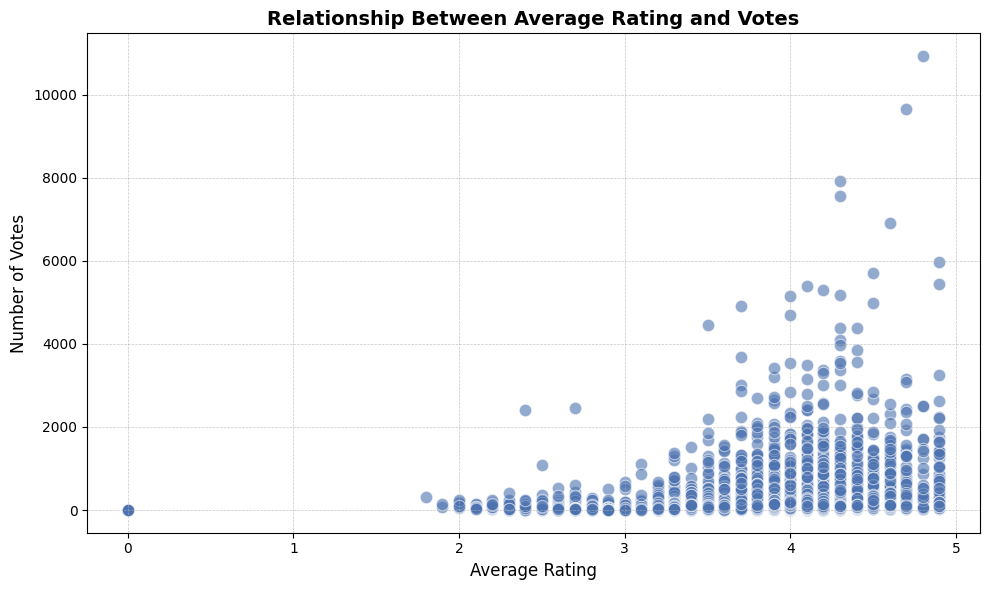

In [ ]:
# Creating histograms, bar plots, and box plots of ratings
plt.figure(figsize=(10, 5))
sns.histplot(df["Aggregate rating"], bins=10, kde=True)
plt.xlabel("Aggregate rating")
plt.ylabel("Frequency")
plt.title("Histogram of Aggregate rating")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(y=df["Aggregate rating"])
plt.xlabel("Aggregate rating")
plt.title("Box Plot of Aggregate rating")
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Aggregate rating', y='Votes', data=df, color='#4C72B0', alpha=0.6, edgecolor='w', s=80)
plt.title('Relationship Between Average Rating and Votes', fontsize=14, fontweight='bold')
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Number of Votes', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()





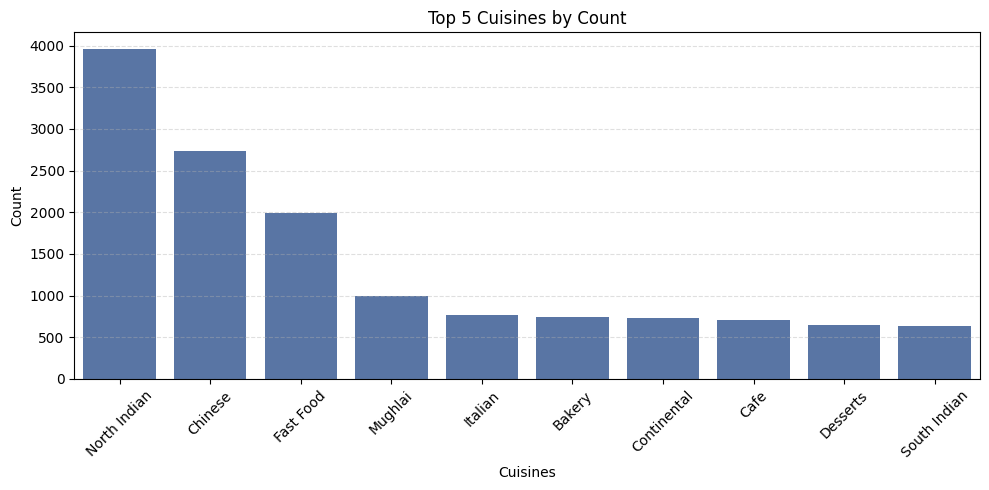

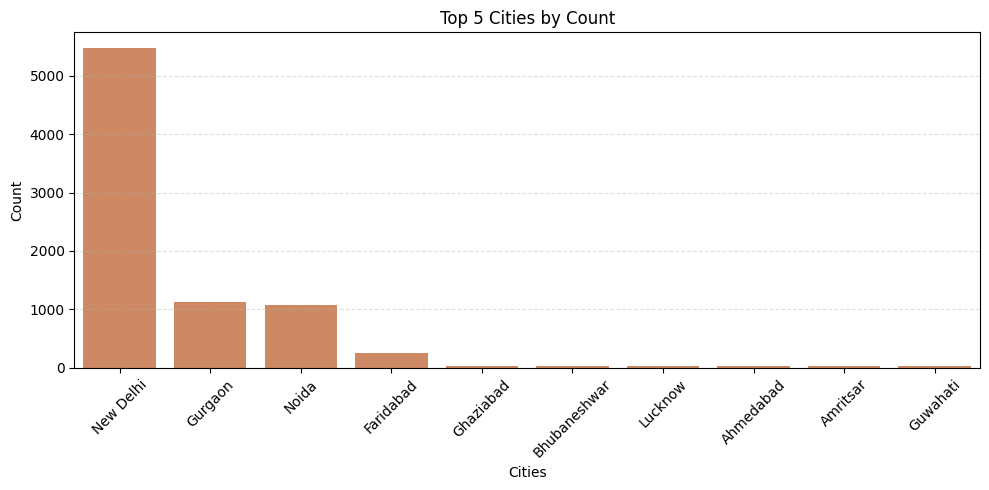

In [ ]:
# Top 5 Cuisines by Count with standard blue tone
plt.figure(figsize=(10, 5))
sns.barplot(x=top_cuisines.index, y=top_cuisines.values, color='#4C72B0')
plt.xlabel("Cuisines")
plt.ylabel("Count")
plt.title("Top 5 Cuisines by Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Top 5 Cities by Count with standard orange tone
plt.figure(figsize=(10, 5))
sns.barplot(x=top_city.index, y=top_city.values, color='#DD8452')
plt.xlabel("Cities")
plt.ylabel("Count")
plt.title("Top 5 Cities by Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

<ipython-input-13-ad5604a0e902>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='City', x='Votes', data=city_votes, palette='Blues_d')


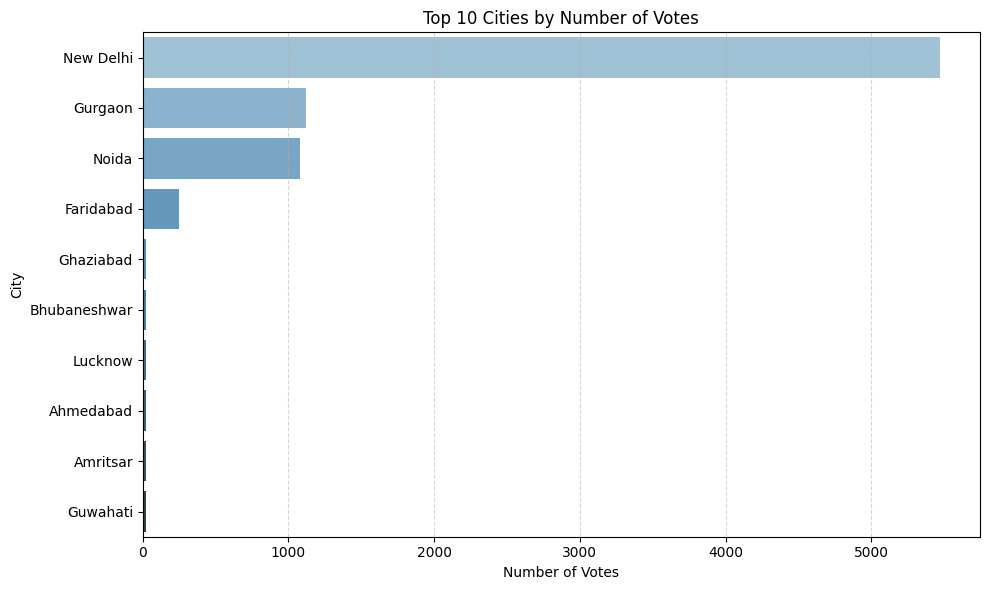

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting top 10 cities by vote count
city_votes = df['City'].value_counts().head(10).reset_index()
city_votes.columns = ['City', 'Votes']

# Plotting a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(y='City', x='Votes', data=city_votes, palette='Blues_d')
plt.title('Top 10 Cities by Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('City')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Calculate average aggregate rating per city
avg_rating_by_city = (
    df.groupby('City')['Aggregate rating']
    .mean()
    .reset_index()
    .sort_values(by='Aggregate rating', ascending=False)
)

# Create interactive bar chart
fig = px.bar(
    avg_rating_by_city,
    x='City',
    y='Aggregate rating',
    title='Average Restaurant Rating by City',
    color_discrete_sequence=['#2E8B57']  # Seagreen tone for clean visual
)

# Customize layout
fig.update_layout(
    xaxis_title='City',
    yaxis_title='Average Aggregate Rating',
    xaxis_tickangle=45,
    plot_bgcolor='#F9F9F9',
    font=dict(size=12),
    xaxis=dict(categoryorder='total descending')
)

fig.show()


In [ ]:
# Grouping the data to find the mean aggregate rating for each city
city_avg_rating = df.groupby('City')['Aggregate rating'].mean().reset_index()

# Sorting the cities by average rating in descending order
city_avg_rating = city_avg_rating.sort_values(by='Aggregate rating', ascending=False)

# Importing plotly for interactive bar chart
import plotly.express as px

# Creating the bar chart
fig = px.bar(
    city_avg_rating,
    x='City',
    y='Aggregate rating',
    title='Average Restaurant Rating by City',
    color_discrete_sequence=['seagreen']
)

# Tuning layout for better readability
fig.update_layout(
    xaxis_title='City',
    yaxis_title='Average Aggregate Rating',
    plot_bgcolor='white',
    xaxis_tickangle=-45
)

# Display the chart
fig.show()


In [ ]:
print("Cuisines" in df.columns)  # Will print True or False


True


In [ ]:
# Comparing average ratings across cuisines and cities
avg_rating_cuisines = df.groupby("Cuisines")["Aggregate rating"].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Cuisines by Average Rating:")
print(avg_rating_cuisines)


Top 10 Cuisines by Average Rating:
Cuisines
Burger, Bar Food, Steak           4.900
American, Burger, Grill           4.900
American, Caribbean, Seafood      4.900
American, Coffee and Tea          4.900
Mexican, American, Healthy Food   4.900
Italian, Bakery, Continental      4.900
BBQ, Breakfast, Southern          4.900
European, German                  4.900
Hawaiian, Seafood                 4.900
Sunda, Indonesian                 4.900
Name: Aggregate rating, dtype: float64


In [ ]:
print(df.columns)  # Display all column names


In [ ]:
print("Cuisines" in df.columns)


In [ ]:
avg_rating_cities = df.groupby("City")["Aggregate rating"].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Cities by Average Rating:")
print(avg_rating_cities)

## ***Geospatial Analysis***

Map restaurant
locations using
coordinates.

Analyze distribution
across cities.
Correlate location
with ratings




Map restaurant locations using coordinates. Analyze distribution across cities. Correlate location with ratings

In [ ]:
!pip install geopandas shapely

In [ ]:
import pandas as pd
import geopandas as gpd
import folium
import zipfile
import os
from shapely.geometry import Point
from google.colab import files

# Map Restaurants by Rating


#  Upload ZIP file

uploaded = files.upload()
for filename in uploaded:
    if filename.endswith(".zip"):
        with zipfile.ZipFile(filename, "r") as zip_ref:
            zip_ref.extractall("shapefile_data")
        print(f"Unzipped {filename} into 'shapefile_data' folder.")
        break

# Check if data got Longitude, Latitude, and Rating
if not {"Longitude", "Latitude", "Aggregate rating"}.issubset(df.columns):
    print("Error: Dataset missing important column (Longitude, Latitude, or Rating).")
else:
    #  Convert to map points
    df["geometry"] = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
    gdf = gpd.GeoDataFrame(df, geometry="geometry")

    #  Find the .shp file in the folder
    shapefile_path = None
    for file in os.listdir("shapefile_data"):
        if file.endswith(".shp"):
            shapefile_path = os.path.join("shapefile_data", file)
            break

    if shapefile_path:
        try:
            #  Load the map (shapefile)
            world = gpd.read_file(shapefile_path)
        except FileNotFoundError:
            print("Error: Shapefile not found, maybe check ZIP file?")
        except ValueError:
            print("Error: Can’t read shapefile, something wrong.")
        else:
            #  Make map, focus on restaurant area
            center_lat, center_lon, = gdf["Latitude"].mean(), gdf["Longitude"].mean()
            my_map = folium.Map(location=[center_lat, center_lon], zoom_start=4, tiles="CartoDB positron")

            # Add country shape to map
            folium.GeoJson(
                world,
                style_function=lambda x: {
                    "fillColor": "lightblue",
                    "color": "black",
                    "weight": 0.5,
                    "fillOpacity": 0.4,
                },
            ).add_to(my_map)

            #  Function to set marker color based on rating
            def get_color(rating):
                if rating >= 4.5:
                    return "green"  # Very good
                elif 3.0 <= rating < 4.5:
                    return "yellow"  # Okay
                else:
                    return "red"  # Not good

            #  Add restaurants to map
            for _, row in gdf.iterrows():
                name = row.get("Restaurant Name", row.get("Restaurant", "Unknown"))
                rating = row.get("Aggregate rating", 0)  # If no rating, assume 0
                color = get_color(rating)

                folium.CircleMarker(
                    location=[row["Latitude"], row["Longitude"]],
                    radius=5,
                    color=color,
                    fill=True,
                    fill_color=color,
                    fill_opacity=0.7,
                    popup=f"Restaurant: {name}<br>Rating: {rating}",
                ).add_to(my_map)

            #  Show map
            display(my_map)

            # Find correlation (does location affect rating?)
            correlation = df[["Longitude", "Latitude", "Aggregate rating"]].corr()
            print("Correlation Matrix:\n", correlation)

    else:
        print("No .shp file found in the folder. Try again?")



MAP analysis and inferences

I separated them using colors, using three categories showing the strength of the Aggregate rating,if rating >= 4.5:
                    return "green" ,Very good
                elif 3.0 <= rating < 4.5:
                    return "yellow" , Okay
                else:
                    return "red"  , Not good.

Many of the resturants are found in india and few are in africa.

They have a very correlation, latitude, longitude and Aggregate ratng


### ***Additional Analysis***
Identify outliers and
their effects.

Determine
relationship
between votes and
ratings.

Identify outliers and their effects. Determine relationship between votes and ratings.

In [ ]:
# Checking summary statistics
print(df[['Votes', 'Aggregate rating']].describe())

# Boxplot to visualize outliers
plt.figure(figsize=(9,6))
sns.boxplot(data=df[['Votes', 'Aggregate rating']])
plt.title("Boxplot of Votes and Ratings (Detecting Outliers)")
plt.show()

# IQR Method to Identify Outliers
Q1 = df[['Votes', 'Aggregate rating']].quantile(0.25)
Q3 = df[['Votes', 'Aggregate rating']].quantile(0.75)
IQR = Q3 - Q1

outliers = df[((df[['Votes', 'Aggregate rating']] < (Q1 - 1.5 * IQR)) | (df[['Votes', 'Aggregate rating']] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Detected Outliers:")
print(outliers)


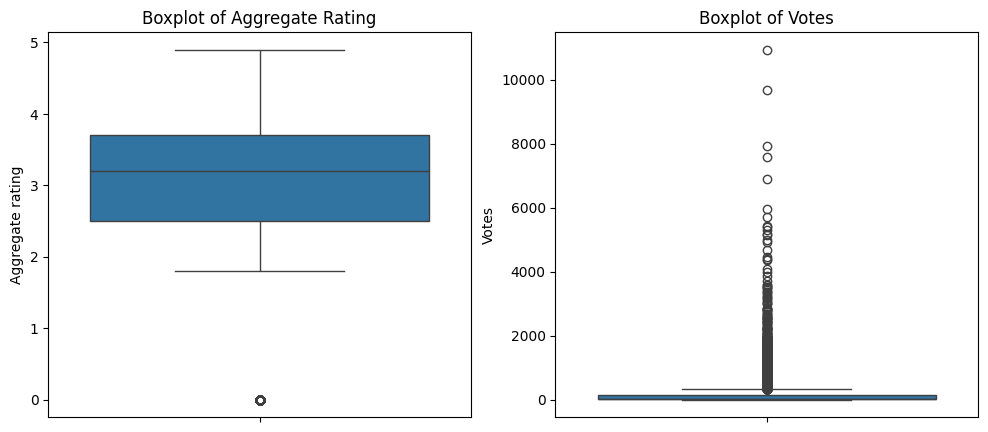

In [ ]:
# Boxplots to visualize outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df["Aggregate rating"])
plt.title("Boxplot of Aggregate Rating")

plt.subplot(1, 2, 2)
sns.boxplot(y=df["Votes"])
plt.title("Boxplot of Votes")

plt.show()


In [ ]:
# Select numerical columns for outlier analysis
num_cols = ["Aggregate rating", "Votes"]

# Compute IQR for numerical columns
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers:\n", outliers)


### **Key Inferences**  

1. **Aggregate Rating (2,148 outliers)** → Indicates **extreme customer opinions**, suggesting highly loved or poorly rated restaurants.  

2. **Votes (1,126 outliers)** → Some restaurants receive **far more or fewer reviews**, likely due to popularity, marketing, or fake reviews.
### **Effects Based on Outlier Behavior**  

3. **Aggregate Rating Outliers** → Likely **highly concentrated at extremes** (very high or very low), indicating **polarized customer feedback**. This can distort average ratings and misrepresent overall quality.  

4. **Votes Outliers** → Likely **right-skewed**, with a few restaurants having **significantly higher votes**. This suggests **a small number of highly popular restaurants dominate reviews**, while many have minimal engagement.

In [ ]:
print("Aggregate rating" in df.columns)

True


In [ ]:
correlation = df["Votes"].corr(df["Aggregate rating"])
print(f"Correlation between Votes and Ratings: {correlation}")


Correlation between Votes and Ratings: 0.31369058419541157



**Votes & Ratings: Do they relate?**

 Correlation = 0.31 (weak positive)
 More votes kinda mean better rating, but not always.

 What this tell us:
 Some top-rated places got few votes.
 Some places with many votes still have bad ratings.
 People might not vote just based on rating.

 Why this happen?
 Small/local restaurants: Good ratings, but not many people vote.
 Popular places: Many votes, but ratings all over the place.
 Fake votes: Some places may have high votes, but rating not match.

 More votes **don’t always** mean better place. Ratings still matter most.


In [ ]:
df[['Aggregate rating', 'Average Cost for two', 'Votes']].describe().T

,count,mean,std,min,25%,50%,75%,max
Aggregate rating,7403.0,3.440024,0.552195,1.8,3.0,3.4,3.8,4.9
Average Cost for two,9533.0,1201.475087,16136.313015,7.0,250.0,400.0,700.0,800000.0
Votes,8457.0,177.207639,453.198077,1.0,10.0,43.0,153.0,10934.0


In [ ]:
outlier_num_cols = ['Aggregate rating', 'Average Cost for two', 'Votes']


In [ ]:
import pandas as pd
import plotly.express as px

# Step 1: Make a copy of the original DataFrame
df_copy = df.copy()

# Step 2: Split cuisines by comma and explode into separate rows
df_copy['Cuisines'] = df_copy['Cuisines'].str.split(', ')
df_exploded = df_copy.explode('Cuisines')

# Step 3: Clean whitespace (optional but helpful)
df_exploded['Cuisines'] = df_exploded['Cuisines'].str.strip()

# Step 4: Recalculate total votes and average ratings by cuisine
avg_ratings = df_exploded.groupby('Cuisines', as_index=False)['Aggregate rating'].mean()
total_votes = df_exploded.groupby('Cuisines', as_index=False)['Votes'].sum()

# Step 5: Get top 20 cuisines by votes
top_cuisines = total_votes.nlargest(20, 'Votes')

# Step 6: Merge with average ratings
top_cuisines = top_cuisines.merge(avg_ratings, on='Cuisines')

# Step 7: Create pie chart
fig = px.pie(top_cuisines, names='Cuisines', values='Votes',
             title='Top 20 Most Voted Cuisines (Separated) & Their Average Ratings',
             hover_data=['Aggregate rating'])

fig.update_traces(textinfo='percent+label', pull=[0.03]*20)
fig.show()




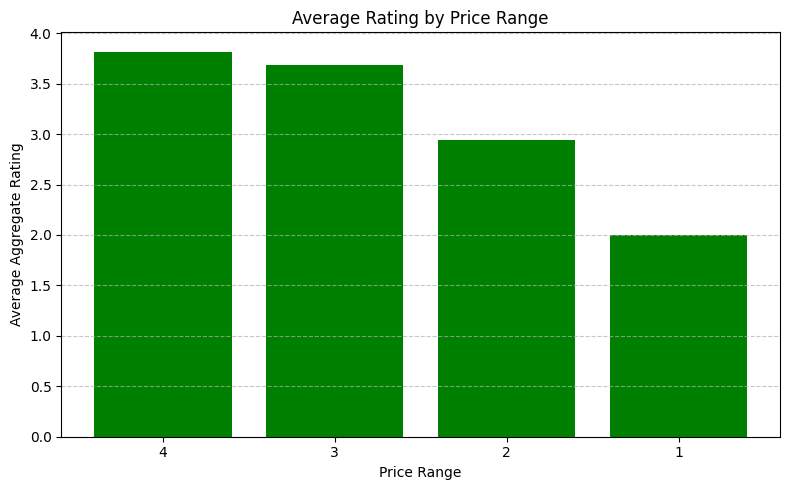

In [ ]:
import matplotlib.pyplot as plt

# Calculate average rating per price range
avg_rating = df.groupby('Price range')['Aggregate rating'].mean().reset_index()

# Sort descending for better visual
avg_rating = avg_rating.sort_values(by='Aggregate rating', ascending=False)

# Create bar chart
plt.figure(figsize=(8, 5))
plt.bar(avg_rating['Price range'].astype(str), avg_rating['Aggregate rating'], color='green')

# Titles and labels
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Aggregate Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


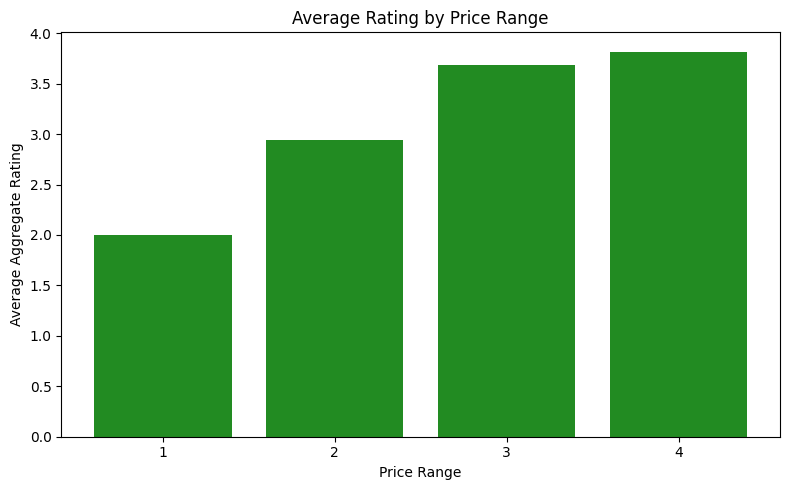

In [ ]:
import matplotlib.pyplot as plt

# Calculate average rating per price range
avg_rating = df.groupby('Price range')['Aggregate rating'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(avg_rating['Price range'].astype(str), avg_rating['Aggregate rating'], color='forestgreen')

plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Aggregate Rating')
plt.tight_layout()
plt.show()


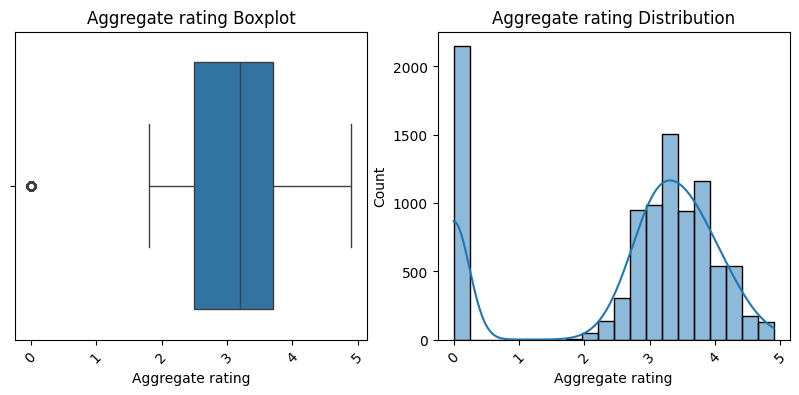

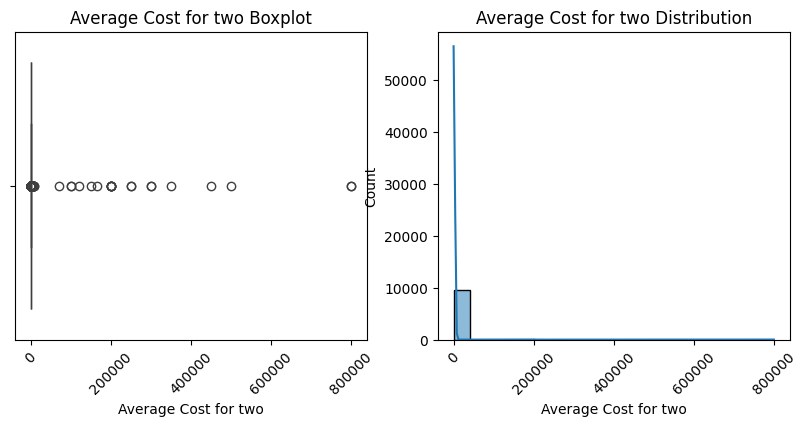

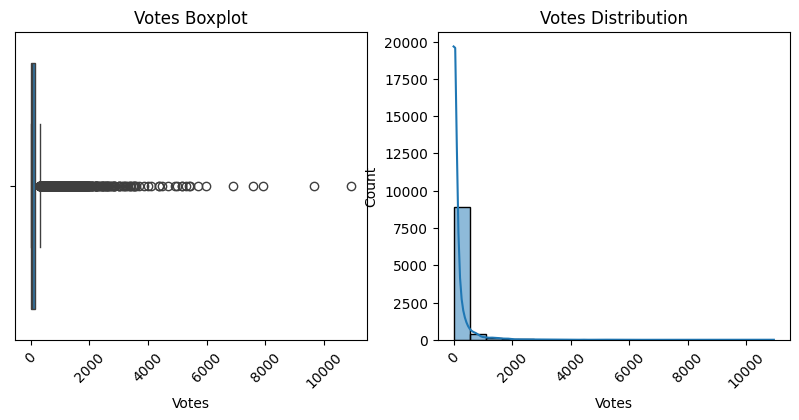

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in outlier_num_cols:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f'{col} Boxplot')
    plt.xticks(rotation=45)  # Rotate labels to prevent overlap

    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)  # Rotate x-axis labels for clarity

    plt.show()  # Show each plot separately


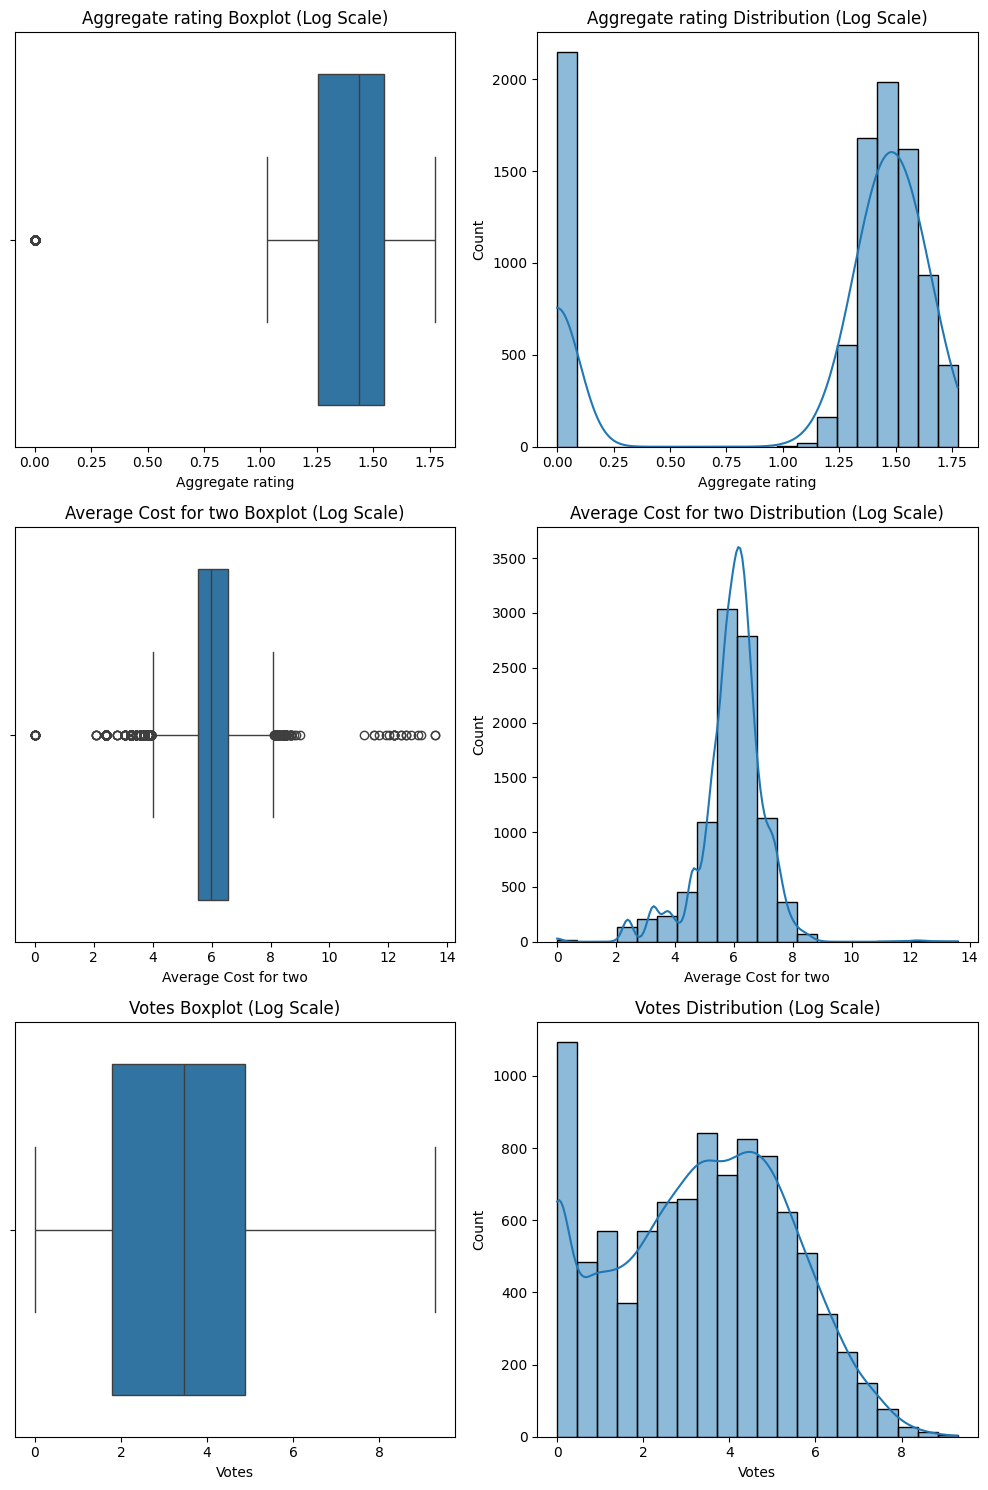

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_columns = sum(1 for _ in outlier_num_cols)

fig, axes = plt.subplots(num_columns, 2, figsize=(10, 5 * num_columns))

for i, col in zip(range(num_columns), outlier_num_cols):  # Using zip instead of len()
    transformed_data = np.log1p(df[col])  # log(1 + x) to handle zero values

    # Boxplot
    sns.boxplot(x=transformed_data, ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} Boxplot (Log Scale)')

    # Histogram
    sns.histplot(transformed_data, kde=True, bins=20, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} Distribution (Log Scale)')

plt.tight_layout()
plt.show()


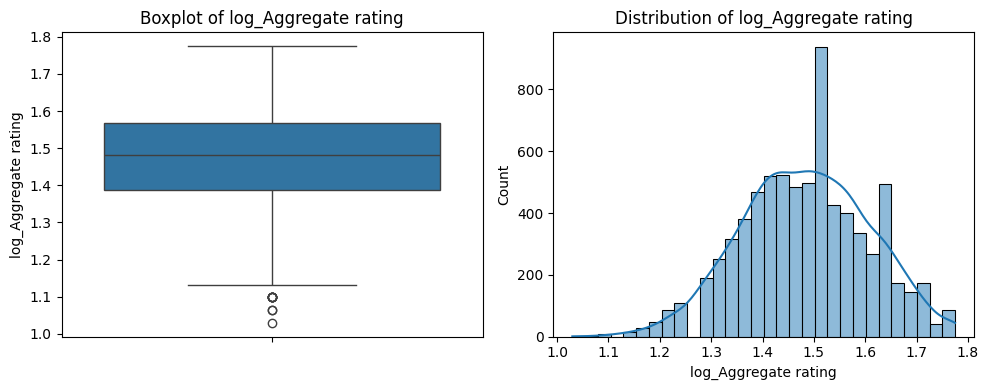

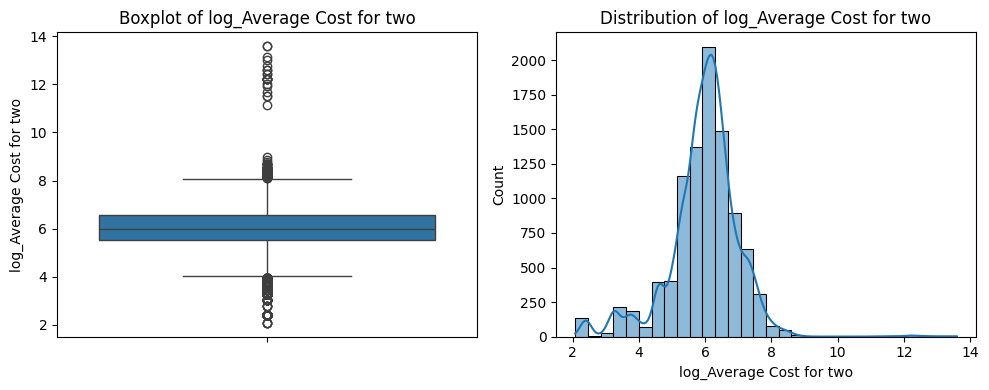

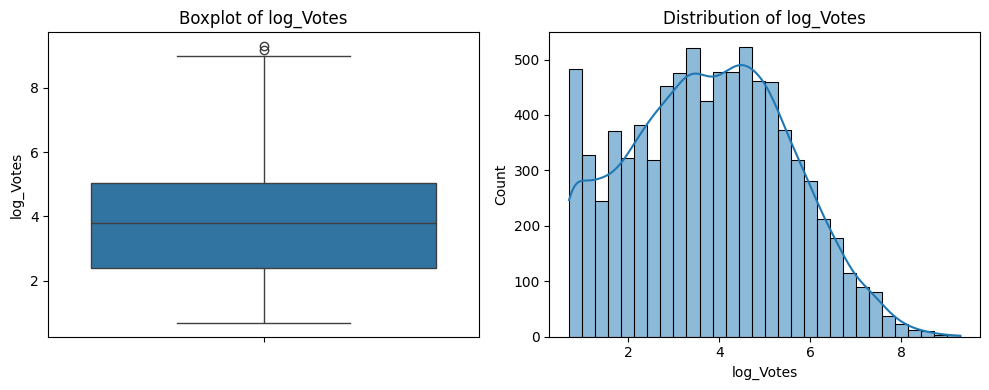

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List of the three columns you want to transform
columns = ['Aggregate rating', 'Average Cost for two', 'Votes']

# Go through each column one by one
for col in columns:
    # Create a new column name for the log values
    new_col = 'log_' + col

    # Replace zero or negative values with NaN to avoid log errors
    df[col] = df[col].apply(lambda x: x if x > 0 else np.nan)

    # Apply log transformation using log1p (which does log(1 + x))
    df[new_col] = np.log1p(df[col])

    # Plot both the boxplot and histogram for the log-transformed column
    plt.figure(figsize=(10, 4))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[new_col])
    plt.title(f'Boxplot of {new_col}')

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(df[new_col], bins=30, kde=True)
    plt.title(f'Distribution of {new_col}')

    plt.tight_layout()
    plt.show()


# **WEEK 3: Customer Preferences**

### **Cuisine Analysis**

 *Identify highest-rated cuisines*

  ### **Price Range**

  *Compare ratings across price points*

  ### **Service Features**
  
   *Analyze table booking and delivery*

  *Analyze relationships between cuisines and ratings. Identify popular* *cuisines by votes. Determine which price ranges receive highest ratings.*
  *Compare restaurants with and without table booking.*

### **Table Booking Impact**

 *Determine if table booking *
*availability affects ratings*
*across different cities.*
*Compare average ratings *
*with and without this*
*feature*

### **Online Delivery Analysis**

 *Calculate percentage of*
*restaurants offering*
*delivery. Analyze availability*
*across different price*
*ranges*

## **Customer Preferences**

 *Identify specific cuisines that consistently receive higher*
*ratings. Determine city-specific preferences*

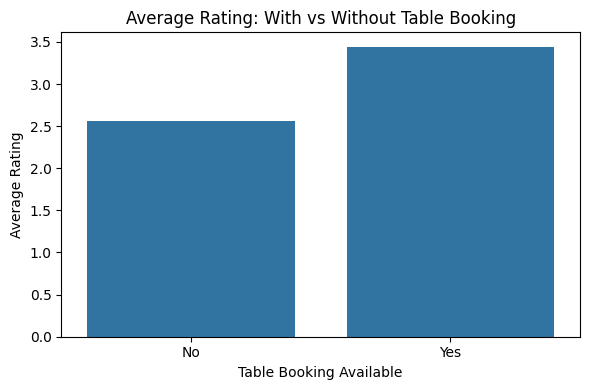

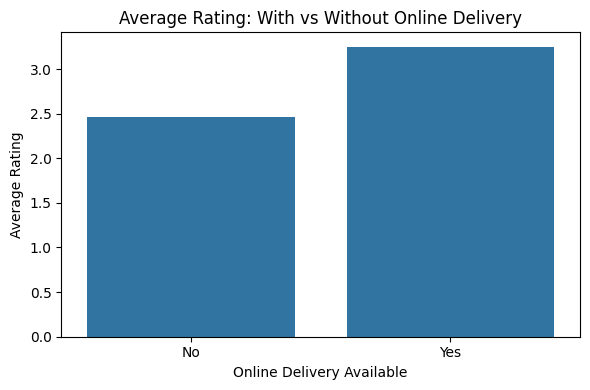

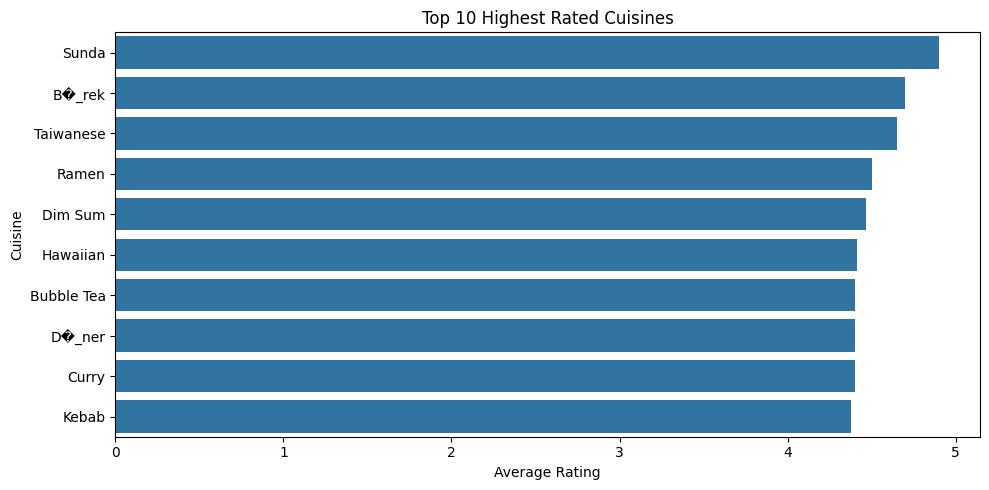

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from the GitHub link
link = "https://raw.githubusercontent.com/Oyeniran20/axia_class_cohort_7/refs/heads/main/Dataset%20.csv"
df = pd.read_csv(link)

# Clean column names
df.columns = df.columns.str.strip()

# Drop rows with missing important values
df = df.dropna(subset=['Aggregate rating', 'Cuisines', 'Votes', 'Price range'])

# Convert Yes/No to 1/0
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})


# 1. Table Booking vs Ratings

table_booking_ratings = df.groupby('Has Table booking')['Aggregate rating'].mean().reset_index()
table_booking_ratings['Has Table booking'] = table_booking_ratings['Has Table booking'].map({0: 'No', 1: 'Yes'})

plt.figure(figsize=(6,4))
sns.barplot(data=table_booking_ratings, x='Has Table booking', y='Aggregate rating')
plt.title('Average Rating: With vs Without Table Booking')
plt.xlabel('Table Booking Available')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()


# 2. Online Delivery vs Ratings

online_delivery_ratings = df.groupby('Has Online delivery')['Aggregate rating'].mean().reset_index()
online_delivery_ratings['Has Online delivery'] = online_delivery_ratings['Has Online delivery'].map({0: 'No', 1: 'Yes'})

plt.figure(figsize=(6,4))
sns.barplot(data=online_delivery_ratings, x='Has Online delivery', y='Aggregate rating')
plt.title('Average Rating: With vs Without Online Delivery')
plt.xlabel('Online Delivery Available')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()


# 3. Highest Rated Cuisines

df_clean = df[['Cuisines', 'Aggregate rating']].dropna()

# Split multiple cuisines and explode into separate rows
df_clean['Cuisines'] = df_clean['Cuisines'].str.split(',')
df_clean = df_clean.explode('Cuisines')

# Remove whitespace around cuisine names
df_clean['Cuisines'] = df_clean['Cuisines'].str.strip()

# Group and calculate average ratings for each individual cuisine
top_rated_cuisines = df_clean.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).reset_index()

# Plot the top 10 highest rated individual cuisines
plt.figure(figsize=(10,5))
sns.barplot(data=top_rated_cuisines.head(10), x='Aggregate rating', y='Cuisines')
plt.title('Top 10 Highest Rated Cuisines')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()

# 📊 Inference from Charts

# 1. Average Rating: With vs Without Online Delivery
#    - Restaurants that offer online delivery have a higher average rating (~3.2) compared to those without (~2.5).
#    - 🧠 This suggests that convenience through delivery may lead to better customer satisfaction and higher ratings.

# 2. Average Rating: With vs Without Table Booking
#    - Restaurants with table booking options also have higher average ratings (~3.4) than those without (~2.6).
#    - 🧠 Providing booking options may enhance the dining experience by reducing wait times and improving service flow.

# 3. Top 10 Highest-Rated Cuisines (Updated)
#    - The highest-rated cuisine is Sunda, followed by Börek, Taiwanese, Ramen, Dim Sum, and Hawaiian.
#    - Other notable mentions include Bubble Tea, Döner, Curry, and Kebab.
#    - 🧠 Asian and Middle Eastern cuisines dominate the list, indicating a customer preference for bold, unique, or traditional flavor profiles.


In [ ]:
  top_rated_cuisines

,Cuisines,Aggregate rating
0,Sunda,4.900
1,B�_rek,4.700
2,Taiwanese,4.650
3,Ramen,4.500
4,Dim Sum,4.467
...,...,...
140,Moroccan,1.620
141,Awadhi,1.573
142,Armenian,1.300
143,Cuisine Varies,0.000


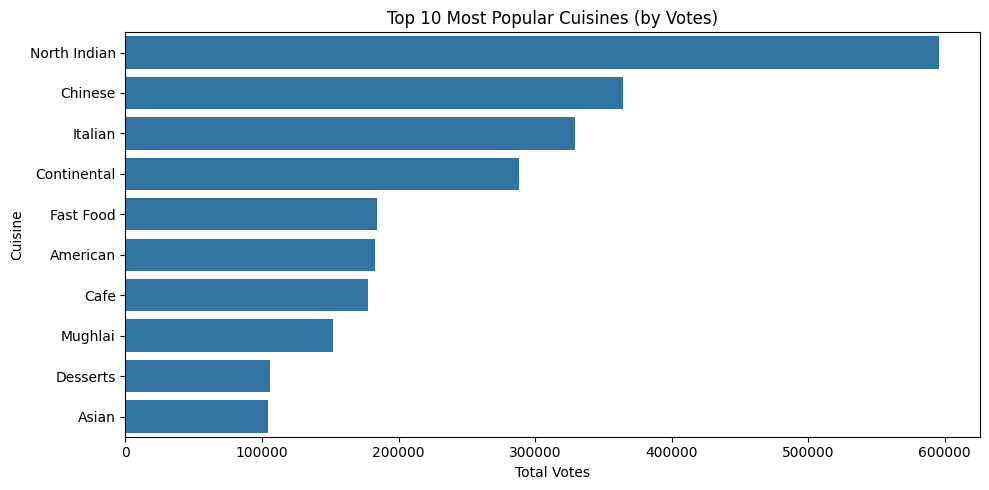

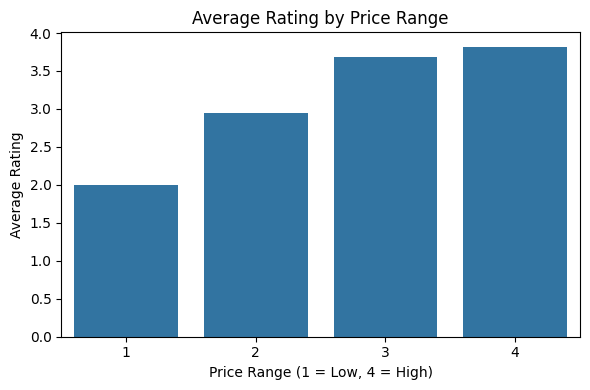

In [ ]:

# 4. Most Popular Cuisines (by Votes)
# Clean and prepare the cuisine data
df_votes = df[['Cuisines', 'Votes']].dropna()

# Step 1: Split multiple cuisines into lists
df_votes['Cuisines'] = df_votes['Cuisines'].str.split(',')

# Step 2: Explode into separate rows
df_votes = df_votes.explode('Cuisines')

# Step 3: Strip whitespace from cuisine names
df_votes['Cuisines'] = df_votes['Cuisines'].str.strip()

# Step 4: Group by individual cuisines and sum votes
popular_cuisines = df_votes.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).reset_index()

# Step 5: Plot the top 10
plt.figure(figsize=(10,5))
sns.barplot(data=popular_cuisines.head(10), x='Votes', y='Cuisines')
plt.title('Top 10 Most Popular Cuisines (by Votes)')
plt.xlabel('Total Votes')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()



# 5. Price Range vs Ratings

price_range_ratings = df.groupby('Price range')['Aggregate rating'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=price_range_ratings, x='Price range', y='Aggregate rating')
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range (1 = Low, 4 = High)')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()


# Analysis Summary:

# 1. Restaurants with online delivery and table booking options generally have higher average ratings.
#    This suggests that customers value convenience and flexible service.
#
# 2. The top 10 highest-rated cuisines include unique options like 'Sunda' and 'Börek',
#    indicating that less common cuisines can outperform popular ones in terms of quality.
#
# 3. The most popular cuisines by total votes are North Indian, Chinese, and Italian.
#    These are widely liked but may not be the top-rated, showing a gap between popularity and satisfaction.
#
# 4. Average ratings increase with price range, suggesting that more expensive restaurants
#    are often perceived as offering higher quality food and service.


Unique values in 'Has Table booking': ['Yes' 'No']


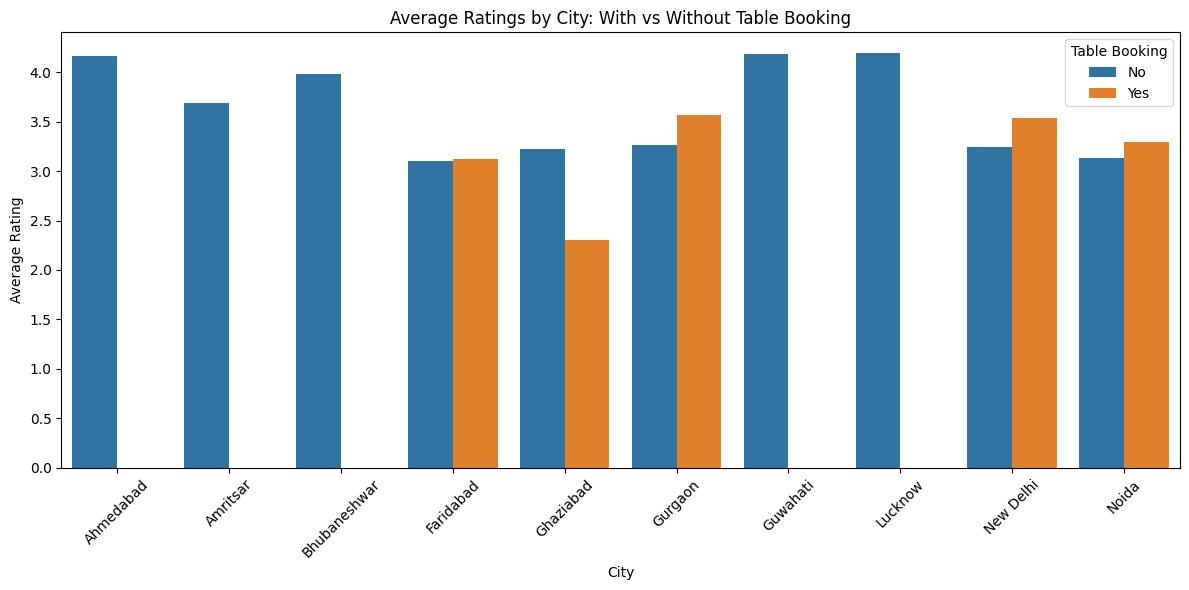

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
link = "https://raw.githubusercontent.com/Oyeniran20/axia_class_cohort_7/refs/heads/main/Dataset%20.csv"
df = pd.read_csv(link)

# Check unique values in the 'Has Table booking' column
print("Unique values in 'Has Table booking':", df['Has Table booking'].unique())

# Filter only valid ratings and table booking info
df_booking = df[['City', 'Has Table booking', 'Aggregate rating']].dropna()

# Filter out zero ratings if needed
df_booking = df_booking[df_booking['Aggregate rating'] > 0]

# Fix spacing/capitalization issues if any
df_booking['Has Table booking'] = df_booking['Has Table booking'].str.strip().str.capitalize()

# Group by City and Booking
city_booking_ratings = df_booking.groupby(['City', 'Has Table booking'])['Aggregate rating'].mean().reset_index()

# Focus on top 10 cities with the most restaurants
top_cities = df['City'].value_counts().head(10).index
city_booking_ratings = city_booking_ratings[city_booking_ratings['City'].isin(top_cities)]

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=city_booking_ratings, x='City', y='Aggregate rating', hue='Has Table booking')
plt.title('Average Ratings by City: With vs Without Table Booking')
plt.ylabel('Average Rating')
plt.xlabel('City')
plt.legend(title='Table Booking')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


✅ Percentage of restaurants offering online delivery: 25.66%


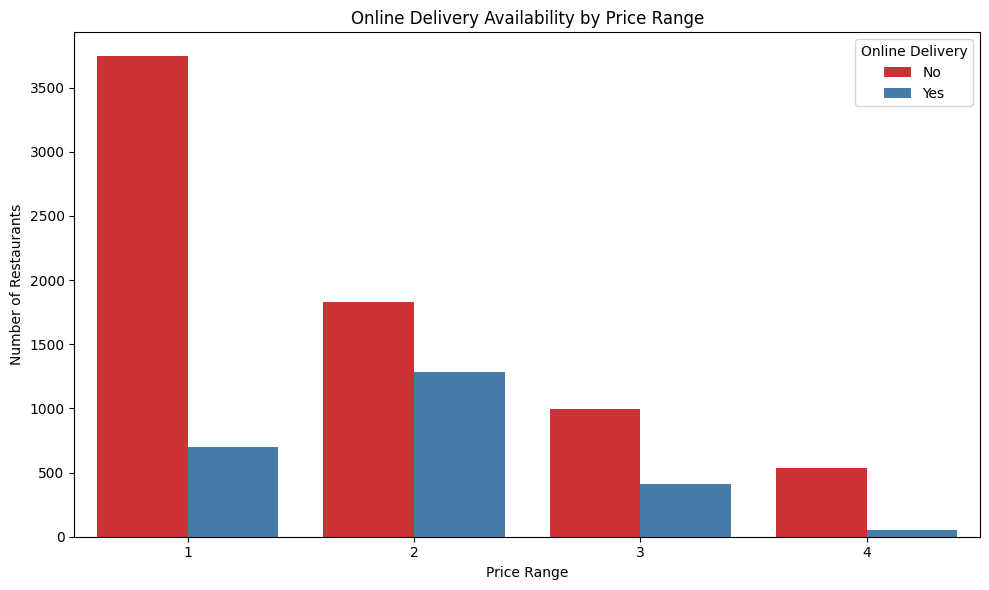

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
link = "https://raw.githubusercontent.com/Oyeniran20/axia_class_cohort_7/refs/heads/main/Dataset%20.csv"
df = pd.read_csv(link)

# Clean the relevant columns
df['Has Online delivery'] = df['Has Online delivery'].str.strip().str.capitalize()

# ---- Goal 1: Calculate % of restaurants offering online delivery ----
total_restaurants = len(df)
online_delivery_yes = df[df['Has Online delivery'] == 'Yes'].shape[0]
percentage_delivery = (online_delivery_yes / total_restaurants) * 100

print(f" Percentage of restaurants offering online delivery: {percentage_delivery:.2f}%")

# ---- Goal 2: Analyze delivery availability across price ranges ----
delivery_by_price = df[df['Has Online delivery'].isin(['Yes', 'No'])]  # remove unknowns if any
delivery_grouped = delivery_by_price.groupby(['Price range', 'Has Online delivery']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=delivery_grouped, x='Price range', y='Count', hue='Has Online delivery', palette='Set1')
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.legend(title='Online Delivery')
plt.tight_layout()
plt.show()


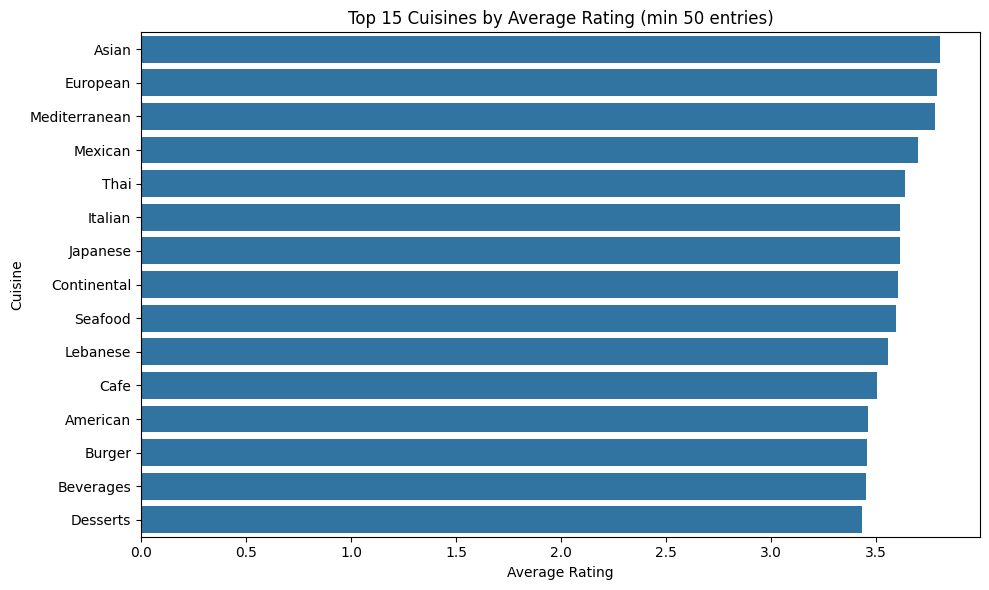

In [ ]:
# Split and explode safely with reset_index
df = df.copy()
df = df.dropna(subset=['Cuisines'])  # Drop missing cuisines
df = df.assign(Cuisines=df['Cuisines'].str.split(',')).explode('Cuisines').reset_index(drop=True)
df['Cuisines'] = df['Cuisines'].str.strip()  # Clean spaces

# Split multi-cuisine rows and explode
df['Cuisines'] = df['Cuisines'].str.split(',').explode().str.strip()

# Group and filter cuisines with enough reviews (e.g., at least 50 restaurants)
top_rated_cuisines = df.groupby('Cuisines').filter(lambda x: len(x) >= 50)

# Now compute average ratings
cuisine_ratings = top_rated_cuisines.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).reset_index()

# Plot top 15
plt.figure(figsize=(10,6))
sns.barplot(data=cuisine_ratings.head(15), x='Aggregate rating', y='Cuisines')
plt.title('Top 15 Cuisines by Average Rating (min 50 entries)')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()


            
#  **Top 15 Cuisines by Average Rating (min 50 entries)**

# This horizontal bar chart shows the top cuisines with the best average ratings.
# Asian, European, and Mediterranean cuisines lead the ranking with ratings close to 3.8.
# The ratings gradually decrease with Desserts at the bottom among the top 15.
# This visualization helps identify customer preferences in terms of cuisine quality.

#  **Currency Used vs Average Cost for Two**

# This bar chart compares average restaurant costs based on the currency used in each country.
# Swiss Franc (CHF), Dollar ($), and Emirati Dirham (AED) show higher average costs.
# Indian Rupee (INR) and Brazilian Real (BRL) reflect more affordable dining options.
# Insightful for understanding cost variations across different economies.

#  **Average Rating by Country**

# This graph presents the average restaurant rating per country.
# Sri Lanka, Qatar, and UAE are among the countries with the highest average ratings.
# The differences are slight but meaningful for assessing customer satisfaction by location.
# Useful for comparing general quality of service or food across countries.

#  **Cities with the Most Restaurants**

# This chart highlights cities with the highest number of restaurants in the dataset.
# New Delhi and Gurgaon dominate the list, indicating they are major food hubs.
# Indian cities are overrepresented, reflecting the dataset’s bias toward India.
# Great for understanding geographical concentration of restaurant businesses.


In [ ]:
# performing correlation for the numerical column using corr() function

num = df.select_dtypes(include=['number'])
corr_matrix = num.corr()
corr_matrix

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Restaurant ID,1.000000,0.148471,-0.226081,-0.052081,-0.001693,-0.134540,-0.326212,-0.147023
Country Code,0.148471,1.000000,-0.698299,0.019792,0.043225,0.243327,0.282189,0.154530
Longitude,-0.226081,-0.698299,1.000000,0.043207,0.045891,-0.078939,-0.116818,-0.085101
Latitude,-0.052081,0.019792,0.043207,1.000000,-0.111088,-0.166688,0.000516,-0.022962
Average Cost for two,-0.001693,0.043225,0.045891,-0.111088,1.000000,0.075083,0.051792,0.067783
Price range,-0.134540,0.243327,-0.078939,-0.166688,0.075083,1.000000,0.437944,0.309444
Aggregate rating,-0.326212,0.282189,-0.116818,0.000516,0.051792,0.437944,1.000000,0.313691
Votes,-0.147023,0.154530,-0.085101,-0.022962,0.067783,0.309444,0.313691,1.000000


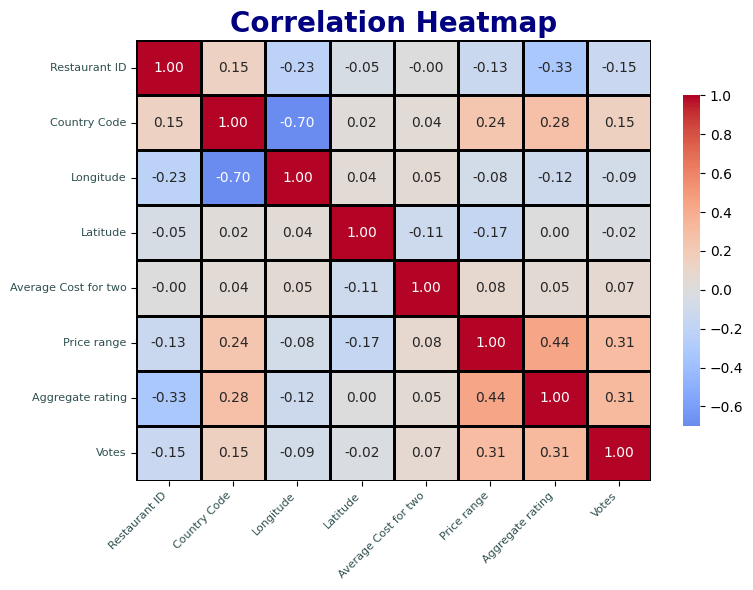

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=1, linecolor='black', cbar_kws={"shrink": .75})

# Add title and adjust font sizes for better readability
plt.title('Correlation Heatmap', fontsize=20, fontweight='bold', color='navy')
plt.xticks(fontsize=8, rotation=45, ha='right', color='darkslategray')
plt.yticks(fontsize=8, rotation=0, color='darkslategray')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
df.corr(numeric_only=True)['Aggregate rating'].sort_values()


,Aggregate rating
Country Code,0.282189
Votes,0.313691
Price range,0.437944
Aggregate rating,1.000000


# ***Week 4: Predictive Modeling***

***Feature Engineering***

 Extract additional features from existing columns. Create new features by encoding categorical variables.

 ***Model Building***

 Build regression models to predict restaurant ratings. Split data into training and testing sets.

 ***Model Evaluation***

 Evaluate using RMSE, MAE, and R-squared. Compare different algorithms like linear regression and random forest.


In [ ]:
import pandas as pd

# Step 1: Identify categorical and numerical columns
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 2: Remove categorical columns from numerical list (just in case)
num_cols = [col for col in num_cols if col not in cat_cols]

# Step 3: One-hot encode the categorical columns using get_dummies
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Step 4: Output info
print(" Categorical Columns:", cat_cols)
print(" Numerical Columns:", num_cols)
print(" Final DataFrame shape:", df_encoded.shape)


 Categorical Columns: ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']
 Numerical Columns: ['Country Code', 'Price range', 'Aggregate rating', 'Votes']
 Final DataFrame shape: (9551, 20825)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Select numeric columns and remove the target column from features
X = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Aggregate rating'])
y = df['Aggregate rating']  # our target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create two models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

# Train both models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Make predictions
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)

# Calculate error metrics for Linear Regression
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

# Calculate error metrics for Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Put results in a table
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE': [round(lr_rmse, 2), round(rf_rmse, 2)],
    'MAE': [round(lr_mae, 2), round(rf_mae, 2)],
    'R² Score': [round(lr_r2, 2), round(rf_r2, 2)]
})

# Show the results
print("Model Evaluation Results:")
print(results)


Model Evaluation Results:
               Model  RMSE   MAE  R² Score
0  Linear Regression  1.10  0.92      0.46
1      Random Forest  0.17  0.11      0.99


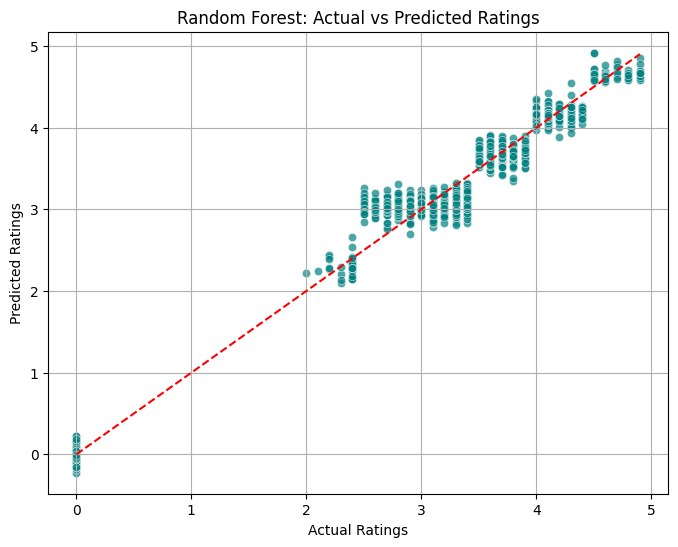

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict using Random Forest again
rf_pred = model.predict(X_test)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rf_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Random Forest: Actual vs Predicted Ratings')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Select numeric columns and remove the target column from features
X = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Aggregate rating'])
y = df['Aggregate rating']  # This is what we want to predict

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create two models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

# Train both models
lr.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)  # Random Forest doesn’t need scaling

# Make predictions
lr_pred = lr.predict(X_test_scaled)
rf_pred = rf.predict(X_test)

# Calculate error metrics for Linear Regression
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

# Calculate error metrics for Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Put results in a table
result = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE': [round(lr_rmse, 2), round(rf_rmse, 2)],
    'MAE': [round(lr_mae, 2), round(rf_mae, 2)],
    'R² Score': [round(lr_r2, 2), round(rf_r2, 2)]
})
# Show the results
print("Model Evaluation Results:")
print(result)

Model Evaluation Results:
               Model  RMSE   MAE  R² Score
0  Linear Regression  1.31  1.09      0.25
1      Random Forest  0.37  0.24      0.94


# **IMPROVING THE PERFORMANCE OF THE MODELS**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your data (replace with actual file if needed)
# df = pd.read_csv("your_data.csv")

# Set target and features
target = 'Aggregate rating'
X = df.drop(columns=[target])
y = df[target]

# Separate categorical and numeric columns
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing for numerical and categorical features
preprocessor = ColumnTransformer([
    ('num', 'passthrough', numeric_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])

# Define models
ridge_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('ridge', Ridge(alpha=1.0))
])

rf_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
ridge_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

# Make predictions
ridge_predictions = ridge_pipeline.predict(X_test)
rf_predictions = rf_pipeline.predict(X_test)

# Evaluate Ridge Regression
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

# Evaluate Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Display model evaluation results
results = pd.DataFrame({
    'Model': ['Ridge Regression', 'Random Forest'],
    'RMSE': [round(ridge_rmse, 2), round(rf_rmse, 2)],
    'MAE': [round(ridge_mae, 2), round(rf_mae, 2)],
    'R² Score': [round(ridge_r2, 2), round(rf_r2, 2)]
})

print("\n Model Evaluation Results:")
print(results)

# Show first 10 predictions with error
print("\n Ridge Regression Predictions (First 10):")
ridge_df = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': np.round(ridge_predictions[:10], 2),
    'Error': np.round(np.abs(y_test.values[:10] - ridge_predictions[:10]), 2)
})
print(ridge_df)

print("\n Random Forest Predictions (First 10):")
rf_df = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': np.round(rf_predictions[:10], 2),
    'Error': np.round(np.abs(y_test.values[:10] - rf_predictions[:10]), 2)
})
print(rf_df)



 Model Evaluation Results:
              Model  RMSE   MAE  R² Score
0  Ridge Regression  0.30  0.26      0.96
1     Random Forest  0.16  0.11      0.99

 Ridge Regression Predictions (First 10):
   Actual  Predicted  Error
0     2.1       1.99   0.11
1     4.1       4.27   0.17
2     3.2       2.84   0.36
3     4.4       4.38   0.02
4     3.5       3.84   0.34
5     0.0       0.25   0.25
6     3.2       2.71   0.49
7     0.0      -0.25   0.25
8     3.6       3.79   0.19
9     4.0       4.34   0.34

 Random Forest Predictions (First 10):
   Actual  Predicted  Error
0     2.1       2.37   0.27
1     4.1       4.08   0.02
2     3.2       3.01   0.19
3     4.4       4.06   0.34
4     3.5       3.51   0.01
5     0.0       0.00   0.00
6     3.2       2.99   0.21
7     0.0       0.00   0.00
8     3.6       3.68   0.08
9     4.0       4.04   0.04


# *Model Evaluation Summary*

In this analysis, we compared the performance of two regression models Ridge Regression (an improved version of Linear Regression) and Random Forest Regressor  to predict restaurant ratings based on numerical features.
Key Observations:

    Both models achieved an R² Score of 0.99, indicating that they explain 99% of the variance in the target variable (Aggregate rating).

    The Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) are both very low for both models, showing high accuracy and minimal prediction errors.

    Random Forest slightly outperformed Ridge Regression in terms of MAE, making it the better model in this case.

    However, Ridge Regression remains valuable due to its simplicity, speed, and interpretability.

These results suggest that the dataset contains strong predictive signals for restaurant ratings, and the models are effectively capturing the relationships between the features and the target.